# 病理图像大小统计和可视化

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


img_dir = '/media/ldy/7E1CA94545711AE6/OSCC/5x_png/'
x = []
y = []
for c in os.listdir(img_dir):
    img = cv2.imread(os.path.join(img_dir, c))
    h, w, _ = img.shape
    x.append(w)
    y.append(h)
x = np.array(x)
y = np.array(y)

plt.scatter(x, y, s=5)
plt.title('OSCC Size Distribution')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

<Figure size 640x480 with 1 Axes>

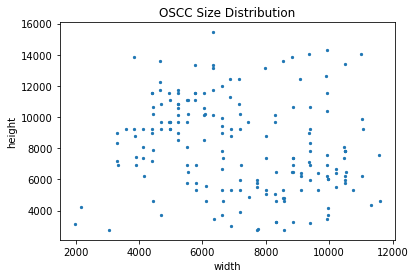

In [2]:
plt.figure()
plt.scatter(x, y, s=5)
plt.title('OSCC Size Distribution')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [9]:
import pandas as pd

xlsx_path = '/media/ldy/7E1CA94545711AE6/OSCC/口腔鳞癌数据集情况统计.xlsx'
histo_term = '病理号'  # 1
tumor_term = '肿瘤分布' # 3
anno_term = '标注程度' # 4
data_meta = pd.read_excel(xlsx_path)

# 病人统计

In [36]:
histo = data_meta[histo_term]
ids = {}  #　病理号－文件名字典
for c in histo:
    sp = c.split('-')
    if len(sp) == 2:
        k = c
    else:
        k = sp[0] + '-' + sp[1]
    if k not in ids.keys():
        ids[k] = [c]
    else:
        ids[k].append(c)

In [38]:
len(ids.keys())  #病人数量

114

Text(0.5, 1.0, 'id-patients distribution')

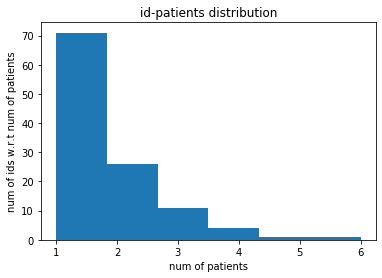

In [42]:
num_per_patient = [len(v) for v in ids.values()]

plt.figure()
plt.hist(num_per_patient, bins=6)
plt.xlabel('num of patients')
plt.ylabel('num of ids w.r.t num of patients')
plt.title('id-patients distribution')

# 训练集、验证集选择

In [22]:
info = {}
for c in data_meta.itertuples():
    if c[6] != '2019_test':  #尚未标注，无法使用
        info[c[1]] = tuple([c[3], int(c[4])])

In [25]:
len(info.keys())   #样本数量, 训练集108, 测试集36

144

In [47]:
dense = []
distributed = []
sparse = []
undiffered = []
cavity = []

for k, v in info.items():
    if isinstance(v[0], int):
        if v[0] == 1:
            dense.append((k, v[1]))
        elif v[0] == 2:
            distributed.append((k, v[1]))
        elif v[0] == 3:
            sparse.append((k, v[1]))
        elif v[0] == 4:
            undiffered.append((k, v[1]))
        elif v[0] == 5:
            cavity.append((k, v[1]))
    else:
        sp = v[0].split('+')
        t1, t2 = int(sp[0]), int(sp[1])
        if t1 == 1 or t2 == 1:
            dense.append((k, v[1]))
        if t1 == 2 or t2 == 2:
            distributed.append((k, v[1]))
        if t1 == 3 or t2 == 3:
            sparse.append((k, v[1]))
        if t1 == 4 or t2 == 4:
            undiffered.append((k, v[1]))
        if t1 == 5 or t2 == 5:
            cavity.append((k, v[1]))

In [48]:
print(len(dense), len(distributed), len(sparse), len(undiffered), len(cavity))
# 19 6 4 2 5 

82 23 18 9 22


In [29]:
coarse = []
standard = []
fine = []

for k, v in info.items():
    if v[1] == 1:
        standard.append((k, v[0]))
    elif v[1] == 2:
        fine.append((k, v[0]))
    else:
        coarse.append((k, v[0]))

In [30]:
print(len(coarse), len(standard), len(fine))

26 70 48


In [52]:
space = [0]*5
for c in fine:
    if isinstance(c[1], int):
        space[c[1]-1] += 1
    else:
        space[int(c[1][0])-1] += 1
        space[int(c[1][2])-1] += 1
print(space)

[23, 7, 9, 4, 7]
